In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import operator
import joblib as joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
dt = pd.read_csv('kidney_disease.csv')
dt.shape

(400, 26)

In [4]:
cols_to_retain = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane']
dt = dt.drop( [col for col in dt.columns if not col in cols_to_retain] , axis = 1 )
dt = dt.dropna(axis = 0 , how = 'any')# if one column is null remove entier row


In [5]:
dt['ba'] = LabelEncoder().fit_transform( dt['ba'])
dt['pcc'] = LabelEncoder().fit_transform( dt['pcc'])
dt['ane'] = LabelEncoder().fit_transform( dt['ane'])
dt['pe'] = LabelEncoder().fit_transform( dt['pe'])
dt['appet'] = LabelEncoder().fit_transform( dt['appet'])
dt['cad'] = LabelEncoder().fit_transform( dt['cad'])
dt['dm'] = LabelEncoder().fit_transform( dt['dm'])
dt['rc'] = LabelEncoder().fit_transform( dt['rc'])
dt['wc'] = LabelEncoder().fit_transform( dt['wc'])
dt['pcv'] = LabelEncoder().fit_transform( dt['pcv'])
dt['rbc'] = LabelEncoder().fit_transform( dt['rbc'])
dt['pc'] = LabelEncoder().fit_transform( dt['pc'])
dt['htn'] = LabelEncoder().fit_transform( dt['htn'])
# dt['classification'] = LabelEncoder().fit_transform( dt['classification'])

<AxesSubplot:>

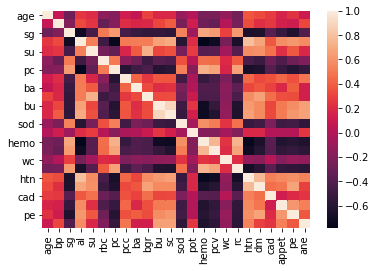

In [6]:
#
data = dt
corr = data.corr()
sns.heatmap(corr)

In [7]:
columns = np.full((corr.shape[0],), True, dtype=bool)

In [8]:
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]

In [9]:
data = data[selected_columns]

In [10]:
selected_columns = selected_columns[1:].values

In [11]:
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):    
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [12]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)
print(selected_columns)

['sod' 'htn']


In [13]:
selected_columns = np.append(selected_columns,['age','classification'])
print(selected_columns)
#

selected_columns = ['age','sg','al','rbc','pc','bu','sc','hemo','pcv','htn','sod','bp','classification']
print(selected_columns)

['sod' 'htn' 'age' 'classification']
['age', 'sg', 'al', 'rbc', 'pc', 'bu', 'sc', 'hemo', 'pcv', 'htn', 'sod', 'bp', 'classification']


In [14]:
dt_new = pd.read_csv('kidney_disease.csv')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [15]:
dt_new = dt_new.drop( [col for col in dt_new.columns if not col in selected_columns] , axis = 1 )
dt_new = dt_new.dropna(axis = 0 , how = 'any')


In [16]:
dt_new['rbc'] = LabelEncoder().fit_transform( dt_new['rbc'])
dt_new['pc'] = LabelEncoder().fit_transform( dt_new['pc'])
dt_new['htn'] = LabelEncoder().fit_transform( dt_new['htn'])
dt_new['classification'] = LabelEncoder().fit_transform( dt_new['classification'])

In [17]:
dt_new

,age,bp,sg,al,rbc,pc,bu,sc,sod,hemo,pcv,htn,classification
3,48.0,70.0,1.005,4.0,1,0,56.0,3.8,111.0,11.2,32,1,0
9,53.0,90.0,1.020,2.0,0,0,107.0,7.2,114.0,9.5,29,1,0
11,63.0,70.0,1.010,3.0,0,0,60.0,2.7,131.0,10.8,32,1,0
14,68.0,80.0,1.010,3.0,1,0,90.0,4.1,130.0,5.6,16,1,0
20,61.0,80.0,1.015,2.0,0,0,148.0,3.9,135.0,7.7,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,1,1,49.0,0.5,150.0,15.7,47,0,1
396,42.0,70.0,1.025,0.0,1,1,31.0,1.2,141.0,16.5,54,0,1
397,12.0,80.0,1.020,0.0,1,1,26.0,0.6,137.0,15.8,49,0,1
398,17.0,60.0,1.025,0.0,1,1,50.0,1.0,135.0,14.2,51,0,1


In [18]:
dt_new.shape

(179, 13)

In [19]:
#dt_new = dt_new.drop( [col for col in dt_new.columns if not col in selected_columns] , axis = 1 )# keep cols_to_retain and drop other rows

In [20]:
X = dt_new.drop(['classification'] , axis = 1)
Y = dt_new['classification']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X , Y , test_size = 0.2)#split test data and train data

In [22]:
#find best K value for KNeighborsClassifier algorithom
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(Y_test,y_pred))
    
print("K_Value all scores : ",scores)   
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))
k_value = index + 1  
print("")
print("Highest K_value :",k_value)

K_Value all scores :  [0.9166666666666666, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]

Highest K_value : 6


# RandomForestClassifier

In [23]:
RFC_model = RandomForestClassifier()

In [24]:
RFC_model.fit(X_train,Y_train)

RandomForestClassifier()

In [25]:
RFC_predict = RFC_model.predict(X_test)

In [26]:
# acc = cross_val_score(RFC_model, X_train, Y_train,scoring='accuracy')

In [27]:
# print("Accuracy : ",acc)

In [28]:
print("RandomForestClassifier accuracy : ",metrics.accuracy_score(Y_test, RFC_predict))
print("r_2 Score :",metrics.r2_score(Y_test,RFC_predict))

RandomForestClassifier accuracy :  1.0
r_2 Score : 1.0


# DecisionTreeClassifier


In [29]:
DTC_model = DecisionTreeClassifier()

In [30]:
DTC_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [31]:
DTC_predict = DTC_model.predict(X_test)

In [32]:
acc = cross_val_score(DTC_model, X_train, Y_train , scoring='accuracy')

In [33]:
print("Accuracy : ",acc)

Accuracy :  [1.         1.         0.96551724 1.         0.96428571]


In [34]:
print("DecisionTreeClassifier accuracy : ",metrics.accuracy_score(Y_test, DTC_predict))
print("r_2 Score :",metrics.r2_score(Y_test,DTC_predict))

DecisionTreeClassifier accuracy :  1.0
r_2 Score : 1.0


# KNeighborsClassifier

In [35]:
KNC_model = KNeighborsClassifier(n_neighbors = k_value)

In [36]:
KNC_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [37]:
KNC_predict = KNC_model.predict(X_test)

In [38]:
acc = cross_val_score(KNC_model, X_train, Y_train,scoring='accuracy')

In [39]:
print("Accuracy : ",acc)

Accuracy :  [0.89655172 0.96551724 0.89655172 1.         1.        ]


In [40]:
print("KNeighborsClassifier accuracy : ",metrics.accuracy_score(Y_test, KNC_predict))
print("r_2 Score :",metrics.r2_score(Y_test,KNC_predict))

KNeighborsClassifier accuracy :  0.9444444444444444
r_2 Score : 0.7230769230769232


# Support vector machine

In [41]:
SVC_model = SVC(kernel='linear')

In [42]:
SVC_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [43]:
SVC_predict = SVC_model.predict(X_test)

In [44]:
acc = cross_val_score(SVC_model, X_train, Y_train,scoring='accuracy')

In [45]:
print("Accuracy : ",acc)

Accuracy :  [1.         1.         0.93103448 1.         1.        ]


In [46]:
print("Support vector machine accuracy : ",metrics.accuracy_score(Y_test, SVC_predict))
print("r_2 Score :",metrics.r2_score(Y_test,SVC_predict))

Support vector machine accuracy :  0.9722222222222222
r_2 Score : 0.8615384615384616


# LogisticRegression

In [47]:
LR_model = LogisticRegression(solver='liblinear')

In [48]:
LR_model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [49]:
LR_predict = LR_model.predict(X_test)

In [50]:
acc = cross_val_score(LR_model, X_train, Y_train,scoring='accuracy')

In [51]:
print("Accuracy : ",acc)

Accuracy :  [1.         1.         0.93103448 1.         1.        ]


In [52]:
print("LogisticRegression accuracy : ",metrics.accuracy_score(Y_test, LR_predict))
print("r_2 Score :",metrics.r2_score(Y_test,LR_predict))

LogisticRegression accuracy :  0.9722222222222222
r_2 Score : 0.8615384615384616


In [53]:
X_test

,age,bp,sg,al,rbc,pc,bu,sc,sod,hemo,pcv,htn
212,40.0,70.0,1.015,3.0,1,1,150.0,11.9,132.0,10.9,31,1
147,60.0,60.0,1.010,3.0,1,0,36.0,1.7,130.0,7.9,25,1
385,63.0,70.0,1.020,0.0,1,1,25.0,0.6,146.0,16.5,52,0
270,23.0,80.0,1.025,0.0,1,1,34.0,1.1,145.0,14.3,41,0
359,74.0,60.0,1.020,0.0,1,1,50.0,0.6,147.0,17.2,53,0
386,46.0,70.0,1.025,0.0,1,1,47.0,0.5,142.0,16.4,43,0
366,60.0,80.0,1.025,0.0,1,1,15.0,0.5,141.0,15.0,46,0
36,76.0,70.0,1.015,1.0,1,1,29.0,1.8,133.0,10.3,32,1
396,42.0,70.0,1.025,0.0,1,1,31.0,1.2,141.0,16.5,54,0
325,58.0,80.0,1.020,0.0,1,1,50.0,1.2,140.0,14.0,50,0


In [54]:
models =[]
models.append(('RFC',RandomForestClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors = k_value )))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SVM',SVC(kernel='linear')))

In [55]:
results = []
names = []
accuracy_values = []
function_name = []

for name,model in models:
    accuracy = cross_val_score(model, X_train, Y_train,scoring='accuracy')
    results.append(accuracy)   
    msg = ("%s: %f" % (name, accuracy.mean()))
    print("Accuracy",msg)
    accuracy_values.append(accuracy.mean())
    function_name.append(name)

Accuracy RFC: 1.000000
Accuracy DTC: 0.986207
Accuracy KNN: 0.951724
Accuracy LR: 0.986207
Accuracy SVM: 0.986207


In [56]:
index, value = max(enumerate(accuracy_values), key=operator.itemgetter(1))

In [57]:
print("Selected algorithm accuracy : ",value)
print("Selected algorithm name :",function_name[index])

Selected algorithm accuracy :  1.0
Selected algorithm name : RFC


In [58]:
model = ""

if function_name[index] == "RFC" :
    model = RandomForestClassifier()
        
elif function_name[index] == "DTC" :
    model = DecisionTreeClassifier()
                
elif function_name[index] == "KNN" :
    model = KNeighborsClassifier(n_neighbors = k_value)
    
elif function_name[index] == "SVM" :
    model = SVC(kernel='linear')
        
elif function_name[index] == "LR" :
    model = LogisticRegression(solver='liblinear')    

In [59]:
model = model.fit(X,Y)

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [62]:
joblib.dump(model,'train_model.joblib')

['train_model.joblib']

In [63]:
# loadModel = joblib.load('train_model.joblib')

In [64]:
# y_pred = model.predict(X_test)

In [65]:
# y_pred